In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import re

import os
import shutil

In [5]:
#iterate through split list and select desired values via index
def text_to_df(text_file):
    
    """Function receives text file(string) as input, and will select image.png name, status code, and target name, and return a pandas DataFrame object"""
    
    text_object = open(text_file)
    
    words_text_1 = text_object.readlines()
    
    #slice unwanted headers from text object
    words_text = words_text_1[18:]
    
    comma_separated = []
    #split text values into comma separated values
    
    for x in words_text: 
        comma_separated.append(x.split())
    
    images = []
    targets = []
    status_code = []

    for target in comma_separated:
        images.append(target[0])
        status_code.append(target[1])
        targets.append(target[-1])
        
    img_array = np.array(images)
    target_array = np.array(targets)
    status_array = np.array(status_code)
    
    img_series = pd.Series(img_array)
    target_series = pd.Series(target_array)
    status_series = pd.Series(status_array)
    
    img_df = pd.DataFrame(img_series)
    target_df = pd.DataFrame(target_series)
    status_df = pd.DataFrame(status_series)
    
    df_1 = img_df.merge(status_df, left_index=True, right_index=True)
    df = df_1.merge(target_df, left_index = True, right_index = True)
    
    df.rename(columns={'0_x': 'image', '0_y':'status_code', 0 : 'target'}, inplace=True)
    
    return df


In [6]:
full_text = text_to_df('words.txt')

In [7]:
full_text.head()

,image,status_code,target
0,a01-000u-02-05,ok,a
1,a01-000u-02-06,ok,meeting
2,a01-000u-02-07,ok,of
3,a01-000u-02-08,ok,Labour
4,a01-000u-03-00,err,Ps


In [8]:
full_text.shape

(115302, 3)

In [9]:
def remove_err(df):
    df.drop(df[df['status_code'] == 'err'].index, inplace = True)
   

In [10]:
remove_err(full_text)

In [11]:
full_text.shape

(96438, 3)

## Adding unique counts column to dataframe to check class balance 

In [12]:
def get_unique_targets(df):
    unique_df = pd.DataFrame(df['target'].value_counts())
    reset_df = unique_df.reset_index()
    reset_df.rename(columns = {'index': 'target', 'target': 'count'}, inplace = True)
    return reset_df
  

In [14]:
master_unique  = get_unique_targets(full_text)

In [15]:
master_unique.head(2)

,target,count
0,the,4986
1,",",4376


In [16]:
#creating new dataframe that includes word counts

new_master = pd.merge(full_text, master_unique, on = 'target')

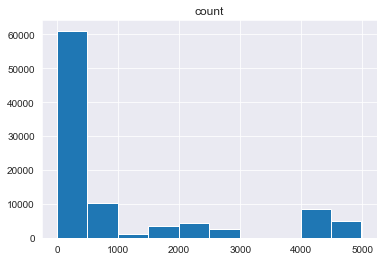

In [17]:
sns.set_style('darkgrid')
new_master.hist()
plt.show()

In [75]:
master_targets = new_master[new_master['count'] > 100]

In [51]:
#remove_from_model = master_targets[master_targets['count'] < 100]

In [76]:
text_words2 = list(master_targets['target'].unique())

In [77]:
text_words2

['a',
 'of',
 'on',
 'the',
 ',',
 'for',
 '.',
 'A',
 'to',
 'Mr.',
 'from',
 'more',
 'is',
 'be',
 'made',
 'at',
 'has',
 'and',
 'he',
 'by',
 'they',
 'may',
 'some',
 'are',
 'will',
 'that',
 'as',
 'which',
 'into',
 'not',
 'He',
 'would',
 '"',
 'up',
 'an',
 'have',
 'been',
 'but',
 'it',
 'two',
 '(',
 'in',
 ':',
 'what',
 'if',
 'his',
 'with',
 'had',
 'them',
 'The',
 'there',
 '-',
 'But',
 'I',
 'no',
 'said',
 'was',
 'were',
 'It',
 'about',
 'can',
 'over',
 'who',
 'out',
 'this',
 'than',
 'their',
 'or',
 'so',
 'new',
 'This',
 ';',
 'other',
 'first',
 'one',
 'all',
 'when',
 'In',
 'much',
 'could',
 'being',
 'time',
 'man',
 'we',
 'him',
 '?',
 'you',
 "'",
 'very',
 'its',
 'like',
 'she',
 'only',
 '!',
 'her',
 '...',
 'me']

In [37]:
master_targets.tail(20)

,image,status_code,target,count
90115,g06-047r-01-03,ok,Anglesey,81
90116,g06-047r-06-01,ok,Anglesey,81
90117,g06-050a-04-01,ok,Anglesey,81
90118,g06-050b-04-03,ok,Anglesey,81
90119,g06-050c-04-03,ok,Anglesey,81
90120,g06-050d-04-00,ok,Anglesey,81
90121,g06-050e-03-05,ok,Anglesey,81
90122,g06-050f-03-01,ok,Anglesey,81
90123,g06-050g-03-04,ok,Anglesey,81
90124,g06-050h-03-08,ok,Anglesey,81


In [28]:
master_targets['target'].unique()

array(['a', 'of', 'Labour', 'down', 'on', 'the', ',', 'for', '.', 'A',
       'to', 'Mr.', 'from', 'any', 'more', 'life', 'is', 'be', 'made',
       'at', 'has', 'and', 'he', 'by', 'they', 'may', 'some', 'are',
       'will', 'that', 'as', 'Government', 'which', 'into', 'should',
       'not', 'now', 'He', 'would', '"', 'up', 'an', 'have', 'been', '#',
       'still', 'but', 'it', 'two', 'get', 'Sir', '(', ')', 'in', 'last',
       ':', 'We', 'what', 'do', 'if', 'through', 'There', 'his', 'with',
       'went', 'had', 'them', 'The', 'there', '-', 'But', 'Minister', 'I',
       'no', 'said', 'was', 'told', 'thought', 'found', 'were', 'They',
       'It', 'see', 'off', 'about', 'before', 'can', 'these', 'over',
       'did', 'German', 'good', 'And', 'who', 'out', 'this', 'than',
       'might', 'their', 'too', 'or', 'so', 'new', 'year', 'know', 'come',
       'This', 'men', ';', 'other', 'always', 'first', 'must', 'those',
       'under', 'many', 'people', 'years', 'my', 'one', 'all', 'w

In [54]:
unique_words = list(master_targets['target'].unique())

In [55]:
unique_words_stripped = []
for words in unique_words:
    if words.isalnum() == True:
        unique_words_stripped.append(words)

In [56]:
len(unique_words_stripped)

85

In [57]:
unique_words_stripped

['a',
 'of',
 'on',
 'the',
 'for',
 'A',
 'to',
 'from',
 'more',
 'is',
 'be',
 'made',
 'at',
 'has',
 'and',
 'he',
 'by',
 'they',
 'may',
 'some',
 'are',
 'will',
 'that',
 'as',
 'which',
 'into',
 'not',
 'He',
 'would',
 'up',
 'an',
 'have',
 'been',
 'but',
 'it',
 'two',
 'in',
 'what',
 'if',
 'his',
 'with',
 'had',
 'them',
 'The',
 'there',
 'But',
 'I',
 'no',
 'said',
 'was',
 'were',
 'It',
 'about',
 'can',
 'over',
 'who',
 'out',
 'this',
 'than',
 'their',
 'or',
 'so',
 'new',
 'This',
 'other',
 'first',
 'one',
 'all',
 'when',
 'In',
 'much',
 'could',
 'being',
 'time',
 'man',
 'we',
 'him',
 'you',
 'very',
 'its',
 'like',
 'she',
 'only',
 'her',
 'me']

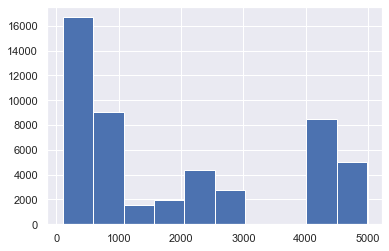

In [40]:
#observing distribution of classes(word images) with greater than 50 files

master_targets['count'].hist()
plt.show()

In [22]:
master_targets.describe()

,count
count,55450.000000
mean,1734.812227
std,1747.939724
min,51.000000
25%,231.000000
50%,820.000000
75%,2741.000000
max,4986.000000


In [41]:
#sort dataframe values by count frequency

master_targets = master_targets.sort_values('count', ascending = False)

In [38]:
master_targets.head()

,image,status_code,target,count
0,a01-000u-02-05,ok,a,1950
1,a01-000u-04-02,ok,a,1950
2,a01-000x-01-10,ok,a,1950
3,a01-000x-03-04,ok,a,1950
4,a01-003-00-08,ok,a,1950


## Remove unwanted punctuation

In [78]:
remove_comma = master_targets[master_targets['target'] == ','].index
remove_period = master_targets[master_targets['target'] == '.'].index
remove_quote = master_targets[master_targets['target'] == '"'].index
remove_single_quote = master_targets[master_targets['target'] == "'"].index

master_targets.drop(remove_comma, inplace = True)
master_targets.drop(remove_period, inplace = True)
master_targets.drop(remove_quote, inplace = True)
master_targets.drop(remove_single_quote, inplace = True)

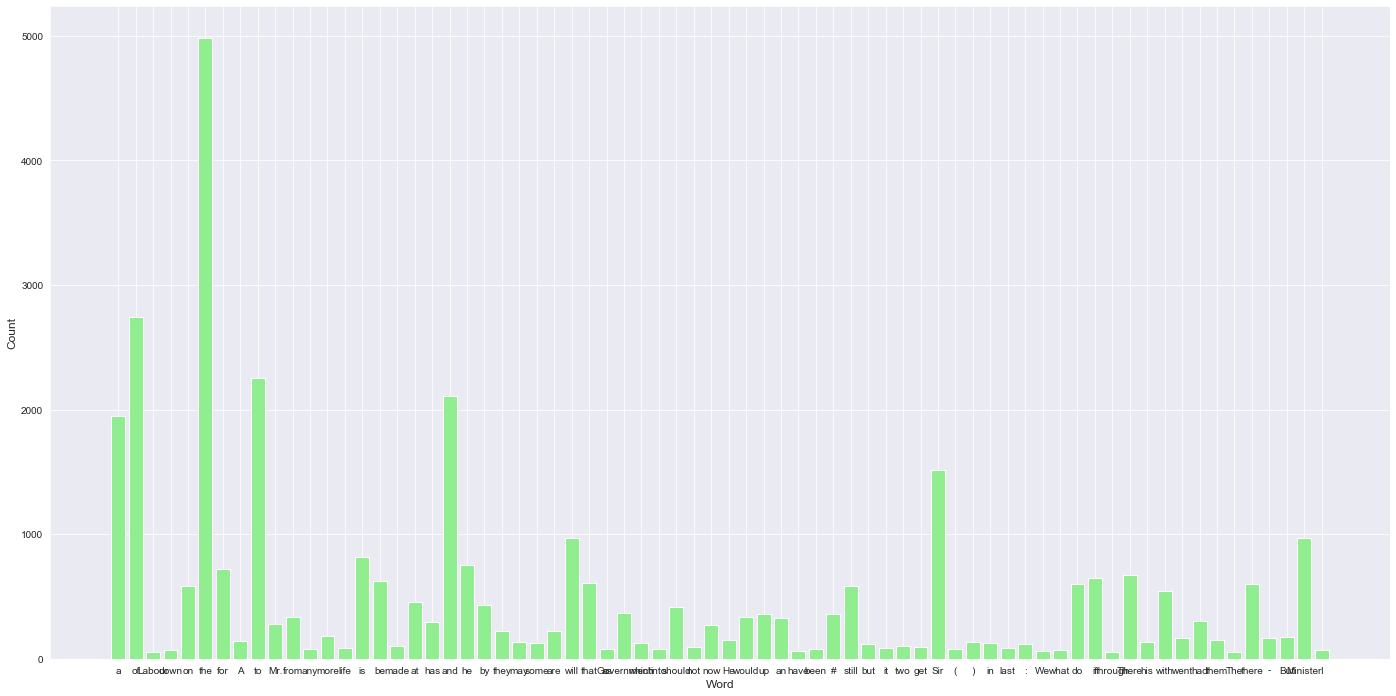

In [40]:
fig, ax = plt.subplots(figsize = (24,12))

sns.set(style = 'darkgrid')


plt.bar(master_targets['target'].unique()[:70], master_targets['count'].unique()[:70], color = 'lightgreen')
plt.xlabel('Word', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

#plt.savefig('train_top10.png', bbox_inches = 'tight')
plt.show()

## Removing excessive samples of frequently occuring words

In [79]:
the = master_targets[master_targets['target'] == 'the'].sample(n = 4800, random_state = 1).index
of = master_targets[master_targets['target'] == 'of'].sample(n = 2300, random_state = 1).index
to = master_targets[master_targets['target'] == 'to'].sample(n = 2000, random_state = 1).index
_and = master_targets[master_targets['target'] == 'and'].sample(n = 1700, random_state = 1).index
_a = master_targets[master_targets['target'] == 'a'].sample(n = 1800, random_state = 1).index
_in = master_targets[master_targets['target'] == 'in'].sample(n = 1100, random_state = 1).index
_is = master_targets[master_targets['target'] == 'is'].sample(n = 400, random_state = 1).index
_he = master_targets[master_targets['target'] == 'he'].sample(n = 400, random_state = 1).index
_for = master_targets[master_targets['target'] == 'for'].sample(n = 200, random_state = 1).index
was = master_targets[master_targets['target'] == 'was'].sample(n = 600, random_state = 1).index
had = master_targets[master_targets['target'] == 'had'].sample(n = 200, random_state = 1).index
be = master_targets[master_targets['target'] == 'be'].sample(n = 200, random_state = 1).index
_with = master_targets[master_targets['target'] == 'with'].sample(n = 200, random_state = 1).index
_as = master_targets[master_targets['target'] == 'as'].sample(n = 200, random_state = 1).index
_i = master_targets[master_targets['target'] == 'I'].sample(n = 200, random_state = 1).index
his = master_targets[master_targets['target'] == 'his'].sample(n = 200, random_state = 1).index
_on = master_targets[master_targets['target'] == 'on'].sample(n = 200, random_state = 1).index
_that = master_targets[master_targets['target'] == 'that'].sample(n = 400, random_state = 1).index


In [80]:
master_targets.drop(the, inplace = True)
master_targets.drop(of, inplace = True)
master_targets.drop(to, inplace = True)
master_targets.drop(_and, inplace = True)
master_targets.drop(_a, inplace = True)
master_targets.drop(_in, inplace = True)

#second round after further plotting and analyzing balance

master_targets.drop(_is, inplace = True)
master_targets.drop(_he, inplace = True)
master_targets.drop(_for, inplace = True)
master_targets.drop(was, inplace = True)
master_targets.drop(had, inplace = True)
master_targets.drop(be, inplace = True)
master_targets.drop(_with, inplace = True)
master_targets.drop(_as, inplace = True)
#master_targets.drop(_i, inplace = True)
master_targets.drop(his, inplace = True)
master_targets.drop(_on, inplace = True)
master_targets.drop(_that, inplace = True)


## Recalculate value counts

In [43]:
trimmed_targets = get_unique_targets(master_targets)

View the results

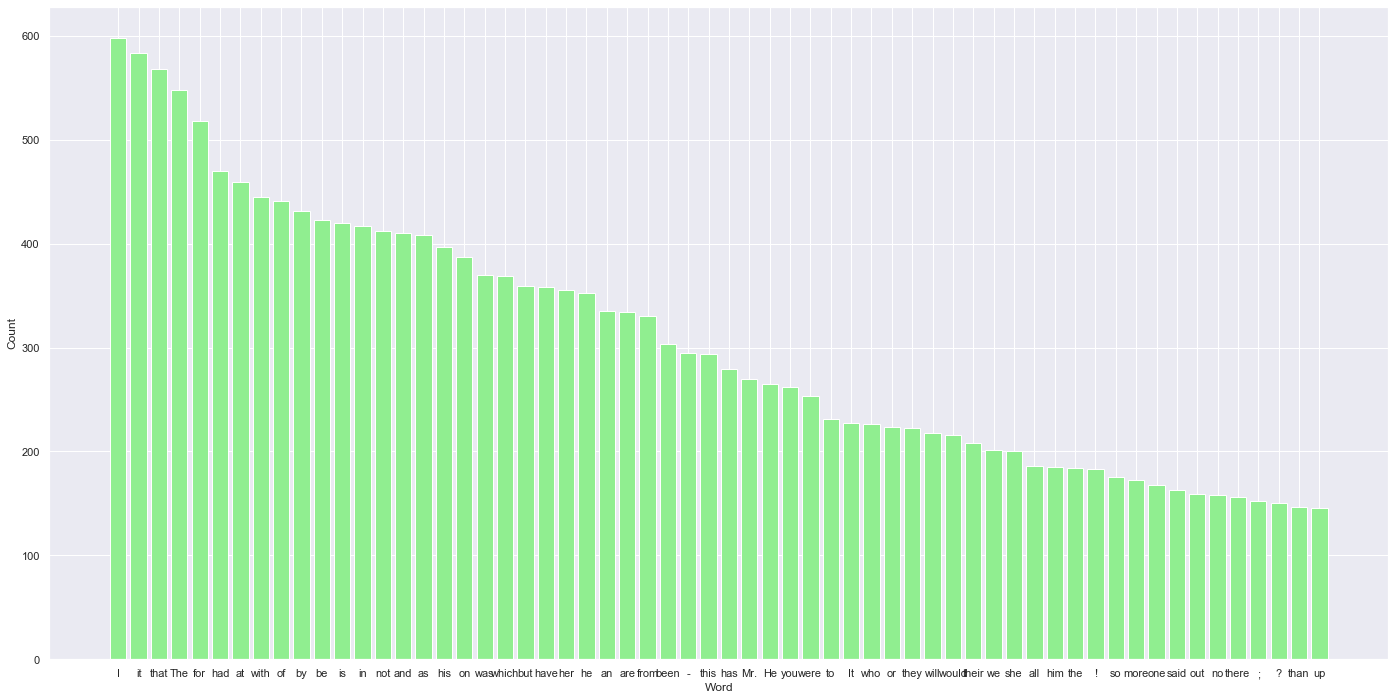

In [72]:
fig, ax = plt.subplots(figsize = (24,12))

sns.set(style = 'darkgrid')


plt.bar(trimmed_targets['target'].unique()[:60], trimmed_targets['count'].unique()[:60], color = 'lightgreen')
plt.xlabel('Word', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

#plt.savefig('train_top10.png', bbox_inches = 'tight')
plt.show()

In [121]:
master_targets.shape

(35435, 4)

In [154]:
master_targets[master_targets['target'] == 'I']

,image,status_code,target,count
44822,n04-000-02-04,ok,I,598
44820,n03-113-07-03,ok,I,598
44821,n04-000-01-11,ok,I,598
44963,r06-143-03-00,ok,I,598
44964,r06-143-03-02,ok,I,598
...,...,...,...,...
44499,g06-018d-06-08,ok,I,598
44498,g06-018c-06-06,ok,I,598
44497,g06-018b-09-01,ok,I,598
44775,m03-020-00-01,ok,I,598


## Remove more samples to further balance classes

In [122]:
# the = master_targets[master_targets['target'] == 'the'].sample(n = 600, random_state = 1).index
# of = master_targets[master_targets['target'] == 'of'].sample(n = 600, random_state = 1).index
# to = master_targets[master_targets['target'] == 'to'].sample(n = 600, random_state = 1).index
# _and = master_targets[master_targets['target'] == 'and'].sample(n = 600, random_state = 1).index
# _a = master_targets[master_targets['target'] == 'a'].sample(n = 400, random_state = 1).index
# _in = master_targets[master_targets['target'] == 'in'].sample(n = 400, random_state = 1).index
# _is = master_targets[master_targets['target'] == 'is'].sample(n = 400, random_state = 1).index
# _he = master_targets[master_targets['target'] == 'he'].sample(n = 400, random_state = 1).index
# _for = master_targets[master_targets['target'] == 'for'].sample(n = 200, random_state = 1).index

In [123]:
# master_targets.drop(the, inplace = True)
# master_targets.drop(of, inplace = True)
# master_targets.drop(to, inplace = True)
# master_targets.drop(_and, inplace = True)
# master_targets.drop(_a, inplace = True)
# master_targets.drop(_in, inplace = True)
# master_targets.drop(_is, inplace = True)
# master_targets.drop(_he, inplace = True)
# master_targets.drop(_for, inplace = True)

In [167]:
further_trimmed_targets = get_unique_targets(master_targets)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

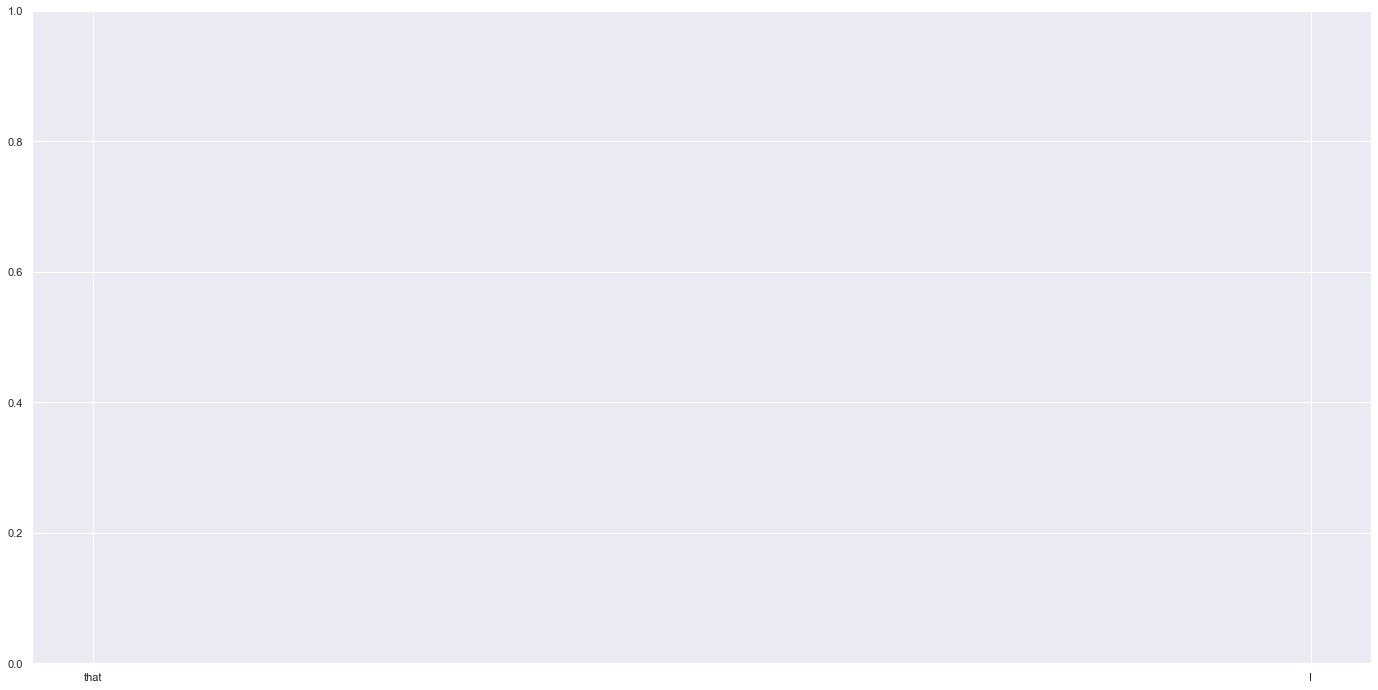

In [168]:
fig, ax = plt.subplots(figsize = (24,12))

sns.set(style = 'darkgrid')


plt.bar(further_trimmed_targets['target'].unique()[:100], further_trimmed_targets['count'].unique()[:10], color = 'lightgreen')
plt.xlabel('Word', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

#plt.savefig('train_top10.png', bbox_inches = 'tight')
plt.show()

## Removing punction that will not be classified for the purposes of this model

In [81]:
remove_comma = master_targets[master_targets['target'] == ','].index
remove_period = master_targets[master_targets['target'] == '.'].index
remove_quote = master_targets[master_targets['target'] == '"'].index
remove_single_quote = master_targets[master_targets['target'] == "'"].index

In [82]:
master_targets.drop(remove_comma, inplace = True)
master_targets.drop(remove_period, inplace = True)
master_targets.drop(remove_quote, inplace = True)
master_targets.drop(remove_single_quote, inplace = True)

In [83]:
master_targets.shape

(22741, 4)

In [84]:
train, test = train_test_split(master_targets, test_size = .10)

In [85]:
train.shape

(20466, 4)

In [86]:
test.shape

(2275, 4)

In [89]:
len(test['target'].unique())

93

In [90]:
len(train['target'].unique())

93

## Moving files to new directories with containing unique word classes

In [ ]:
#iterate through list of unique words

#match words to image file rows from dataframe

#move all image files to desired folders containing proper class names

In [93]:
len(unique_words_stripped)

85

In [94]:
unique_words_stripped

['a',
 'of',
 'on',
 'the',
 'for',
 'A',
 'to',
 'from',
 'more',
 'is',
 'be',
 'made',
 'at',
 'has',
 'and',
 'he',
 'by',
 'they',
 'may',
 'some',
 'are',
 'will',
 'that',
 'as',
 'which',
 'into',
 'not',
 'He',
 'would',
 'up',
 'an',
 'have',
 'been',
 'but',
 'it',
 'two',
 'in',
 'what',
 'if',
 'his',
 'with',
 'had',
 'them',
 'The',
 'there',
 'But',
 'I',
 'no',
 'said',
 'was',
 'were',
 'It',
 'about',
 'can',
 'over',
 'who',
 'out',
 'this',
 'than',
 'their',
 'or',
 'so',
 'new',
 'This',
 'other',
 'first',
 'one',
 'all',
 'when',
 'In',
 'much',
 'could',
 'being',
 'time',
 'man',
 'we',
 'him',
 'you',
 'very',
 'its',
 'like',
 'she',
 'only',
 'her',
 'me']

In [ ]:
unique_words_stripped, train df, new_train folder

In [60]:
def word_to_folder(word, df, folder):
    """
    Function receives target word directory, dataframe containing image names, and sub-directory within "../text-recognition" repo
    
    Image files containing word will be moved to the specified folder 
    
    """
    
    new_df = df[df['target'] == word]
    
    the_directories = list(new_df['image'] + '.png')
    full_path = []
    
    for root, dirs, files in os.walk('full_set_words'):
        for name in files:
            if name in the_directories:
                full_path.append(os.path.join(root, name))
                
    split_directories = []
    
    for lists in full_path:
        split_directories.append(lists.split('/'))
        
    indexed_png = []
    
    for img in split_directories:
        indexed_png.append(img[3])
        
    i=0
    for x in full_path:
        shutil.move('../text-recognition/'+f'{x}', '../text-recognition/'+folder+'/'+word+'/'+f'{indexed_png[i]}')
        i+=1
        

In [231]:
# #checking that images are being placed in new directories correctly before executing full list


# word_to_folder('a', train, 'new_train')

In [61]:
def all_words_to_folders(list_of_words, df, folder):
    for word in list_of_words:
        try:
            word_to_folder(word, df, folder)
        except:
            print('failed to execute')
        

In [91]:
all_words_to_folders(unique_words_stripped, train, '2_train_balanced')

In [92]:
all_words_to_folders(unique_words_stripped, test, '2_test_balanced')